In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [2]:
df=pd.read_csv('iris.csv')

In [3]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [6]:
# removing all null values row
df=df.dropna(subset=['Species'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [8]:
# plot

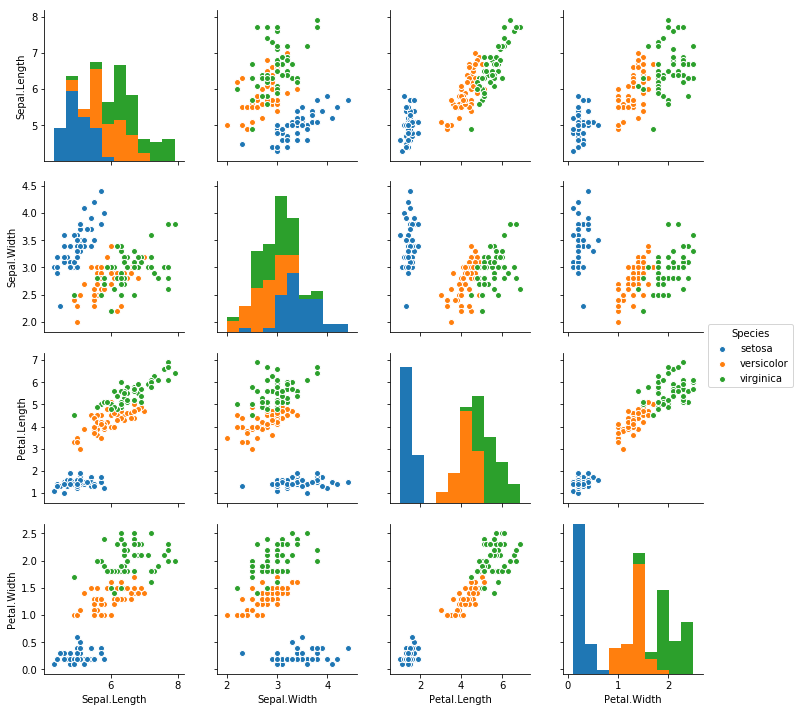

In [10]:
sns.pairplot(df,hue='Species',size=2.5)

In [11]:
df['Species'].value_counts()

versicolor    50
virginica     50
setosa        50
Name: Species, dtype: int64

# simple logistic Regression

In [12]:
final_df=df[df['Species']!='virginica']

In [13]:
final_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
final_df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.099000,2.861000,0.786000
std,0.641698,0.478739,1.449549,0.565153
min,4.300000,2.000000,1.000000,0.100000
25%,5.000000,2.800000,1.500000,0.200000
50%,5.400000,3.050000,2.450000,0.800000
75%,5.900000,3.400000,4.325000,1.300000
max,7.000000,4.400000,5.100000,1.800000


# Outliner Check

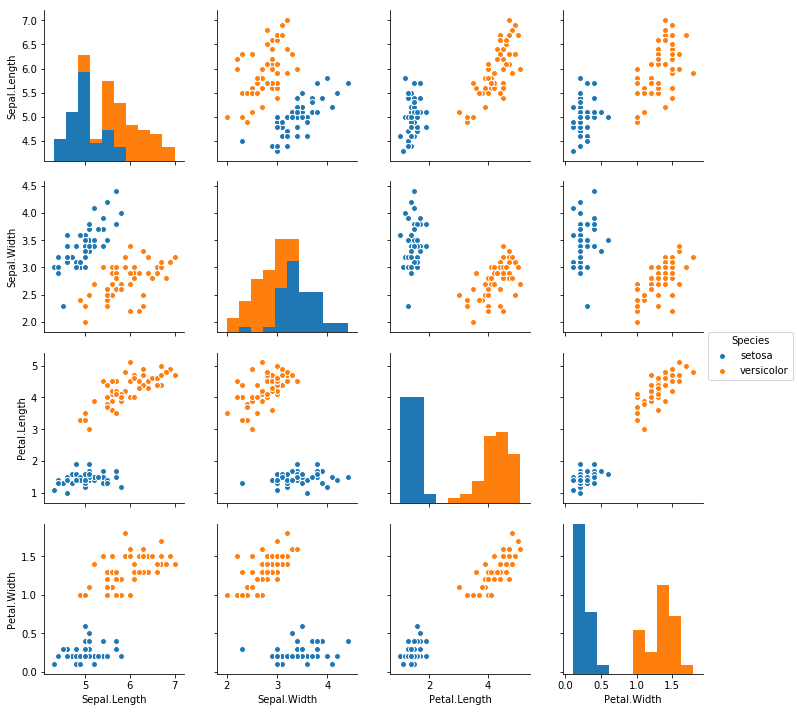

In [15]:
sns.pairplot(final_df,hue='Species',size=2.5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016B8E5D6160>]],
      dtype=object)

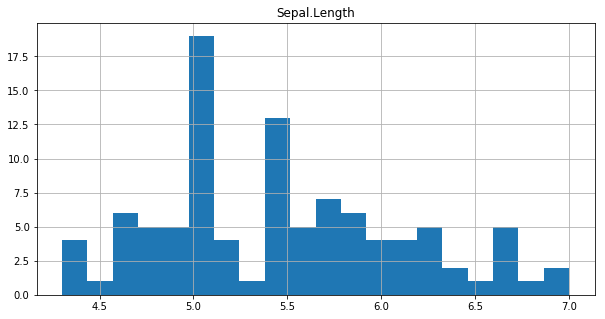

In [17]:
final_df.hist(column='Sepal.Length',bins=20,figsize=(10,5))

# Label Encoding

In [21]:
final_df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.099000,2.861000,0.786000
std,0.641698,0.478739,1.449549,0.565153
min,4.300000,2.000000,1.000000,0.100000
25%,5.000000,2.800000,1.500000,0.200000
50%,5.400000,3.050000,2.450000,0.800000
75%,5.900000,3.400000,4.325000,1.300000
max,7.000000,4.400000,5.100000,1.800000


In [22]:
final_df['Species'].replace(['setosa','versicolor'],[1,0],inplace=True)

G:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [23]:
final_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


# Model Construction

In [35]:
inp_df=final_df.drop(final_df.columns[[4]],axis=1)
out_df=final_df.drop(final_df.columns[[0,1,2,3]],axis=1)
scaler=StandardScaler()
inp_df=scaler.fit_transform(inp_df)
#print(inp_df)
X_train,X_test,y_train,y_test=train_test_split(inp_df,out_df,test_size=0.2,random_state=42)
y_train.as_matrix()


G:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


array([[0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0]], dtype=int64)

In [63]:
X_tr_arr=X_train
X_ts_arr=X_test
y_tr_arr=y_train.as_matrix()
y_ts_arr=y_test.as_matrix()

G:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
G:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [65]:
X_tr_arr.shape

(80, 4)

In [38]:
print('Input Shape',(X_tr_arr.shape))
print('Output Shape',(X_ts_arr.shape))

Input Shape (80, 4)
Output Shape (20, 4)


In [39]:
def weightInitialization(n_features):
    w=np.zeros((1,n_features))
    b=0
    return w,b

In [40]:
weightInitialization(4)

(array([[0., 0., 0., 0.]]), 0)

In [48]:
def sigmoid_activation(result):
    final_result=1/(1+np.exp(-result))
    return final_result

In [59]:
def model_optimize(w,b,X,Y):
    m=X.shape[0]
    # prediction
    final_result=sigmoid_activation(np.dot(w,X.T)+b)
    Y_T=Y.T
    cost=(-1/m)*(np.sum((Y_T*np.log(final_result))+((1-Y_T)*(np.log(1-final_result))))
    dw = (1/m)*(np.dot(X.T,(final_result-Y_T).T))
    db = (1/m)*(np.sum(final_result-Y_T))
    grads={"dw":dw,"db":db}
    return grads,cost

SyntaxError: invalid syntax (<ipython-input-59-522d20eeeb85>, line 7)

In [60]:
def model_optimize(w,b,X,Y):
    m=X.shape[0]
    #Prediction 
    final_result=sigmoid_activation(np.dot(w,X.T)+b)
    Y_T=Y.T
    cost=(-1/m)*(np.sum((Y_T*np.log(final_result))+((1-Y_T)*(np.log(1-final_result)))))
    dw=(1/m)*(np.dot(X.T,(final_result-Y_T).T))
    #Gradient calculation
    db=(1/m)*(np.sum(final_result-Y_T))
    grads={"dw":dw,"db":db}
    return grads,cost

In [70]:
def model_predict(w,b,X,Y,learning_rate,no_iteration):
    costs=[]
    for i in range(no_iteration):
        #
        grads,cost=model_optimize(w,b,X,Y)
        dw=grads['dw']
        db=grads['db']
        #weight update 
        w=w-(learning_rate*(dw.T))
        b=b-(learning_rate*db)
        if(i%100==0):
            costs.append(cost)
            print("cost after %i iteration  is %f" %(i,cost))
    #final parameters
    coeff={"w":w,"b":b}
    gradient={"dw":dw,"db":db}
    return coeff,gradient,costs
        

In [71]:
def predict(final_pred,m):
    y_pred=np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i]>0.5:
            y_pred[0][i]=1
    return y_pred        

In [73]:
#Get number of features
n_features=X_tr_arr.shape[1]
print('Number of Features',n_features)
w,b=weightInitialization(n_features)
#Gradient Descent
coeff,gradient,costs=model_predict(w,b,X_tr_arr,y_tr_arr,learning_rate=0.0002,no_iteration=4500)
#Final prediction
w=coeff['w']
b=coeff['b']
print("optimized weights",w)
print("optimized intercept",b)
#
final_train_pred=sigmoid_activation(np.dot(w,X_tr_arr.T)+b)
final_test_pred=sigmoid_activation(np.dot(w,X_ts_arr.T)+b)
#
m_tr=X_tr_arr.shape[0]
m_ts=X_ts_arr.shape[0]
#
y_tr_pred=predict(final_train_pred,m_tr)
print("Train Accuracy",accuracy_score(y_tr_pred.T,y_tr_arr))
#
y_ts_pred=predict(final_test_pred,m_ts)
print("Test Accuracy",accuracy_score(y_ts_pred.T,y_ts_arr))

Number of Features 4
cost after 0 iteration  is 0.693147
cost after 100 iteration  is 0.679468
cost after 200 iteration  is 0.666187
cost after 300 iteration  is 0.653290
cost after 400 iteration  is 0.640766
cost after 500 iteration  is 0.628605
cost after 600 iteration  is 0.616794
cost after 700 iteration  is 0.605323
cost after 800 iteration  is 0.594182
cost after 900 iteration  is 0.583359
cost after 1000 iteration  is 0.572844
cost after 1100 iteration  is 0.562628
cost after 1200 iteration  is 0.552701
cost after 1300 iteration  is 0.543053
cost after 1400 iteration  is 0.533675
cost after 1500 iteration  is 0.524559
cost after 1600 iteration  is 0.515696
cost after 1700 iteration  is 0.507077
cost after 1800 iteration  is 0.498694
cost after 1900 iteration  is 0.490540
cost after 2000 iteration  is 0.482607
cost after 2100 iteration  is 0.474888
cost after 2200 iteration  is 0.467375
cost after 2300 iteration  is 0.460063
cost after 2400 iteration  is 0.452943
cost after 2500 

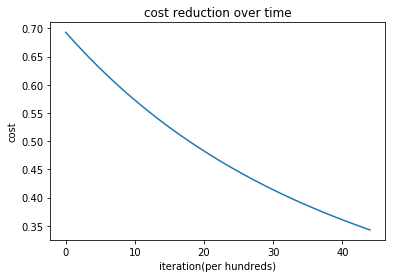

In [74]:
plt.plot(costs)
plt.ylabel("cost")
plt.xlabel("iteration(per hundreds)")
plt.title('cost reduction over time')
plt.show()

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
clf=LogisticRegression()

In [77]:
clf.fit(X_tr_arr,y_tr_arr)

G:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [78]:
print(clf.intercept_,clf.coef_)

[-0.16204011] [[-0.79993072  1.10796913 -1.4608356  -1.48301779]]


In [79]:
pred=clf.predict(X_ts_arr)

In [80]:
print('Accuracy from sk-learn :{0}'.format(clf.score(X_ts_arr,y_ts_arr)))

Accuracy from sk-learn :1.0
